<a href="https://colab.research.google.com/github/yokahealthcare/Anasa-GAN/blob/master/%5BMain_v2%5D%20%5BAE%5D%20Breathing_Wave.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AE - AutoEncoder

## PART 1 : Data Preprocessing

### Importing Libraries

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

### Download the dataset

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/yokahealthcare/Anasa-GAN/master/dataset/breathing_waveform_data.csv").iloc[:, :-1] # get rid of last column ("notes")

### Filter the zeros values
> This will filtered the zeros value from all column (except first column)
>
> CAUSE : I think is natural for the first column to be 0.0 (because the time(X) still on 0 second)

In [ ]:
zeros_val = df[df.iloc[:, 1:].eq(0).any(axis=1)]

In [ ]:
zeros_val

,0,1,2,3,4,5,6,7,8,9,...,76,77,78,79,80,81,82,83,84,labels
5473,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,normal
5474,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,normal
5475,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,normal
5476,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,normal
5477,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6142,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,normal
6143,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,normal
6144,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,normal
6145,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,normal


### Drop the table that has value zeros on it

In [ ]:
df = df[~df.isin(zeros_val)].dropna()

In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,...,76,77,78,79,80,81,82,83,84,labels
0,0.483309,0.459790,0.431024,0.376565,0.295734,0.193290,0.066060,-0.083445,-0.247221,-0.409374,...,0.391514,0.452677,0.521407,0.595845,0.661691,0.702932,0.708613,0.682564,0.637765,deep
1,-2.044518,-1.935588,-1.808629,-1.667919,-1.513497,-1.348760,-1.171044,-0.972509,-0.759554,-0.547793,...,0.138731,-0.053860,-0.241691,-0.417603,-0.582320,-0.738485,-0.889731,-1.037066,-1.174654,deep
2,-1.213535,-1.269056,-1.323306,-1.375251,-1.430062,-1.485479,-1.529200,-1.557172,-1.574662,-1.575457,...,0.947940,0.996154,1.035743,1.049543,1.024204,0.954716,0.844505,0.702445,0.541555,deep
3,-0.914806,-0.887726,-0.856065,-0.823527,-0.794551,-0.768074,-0.740895,-0.713364,-0.685445,-0.652020,...,-0.478218,-0.571465,-0.684115,-0.817078,-0.966231,-1.122537,-1.264759,-1.376908,-1.461059,deep
4,-1.547469,-1.458818,-1.362120,-1.264829,-1.164948,-1.060064,-0.954496,-0.849448,-0.742812,-0.636614,...,0.227050,0.130983,0.041438,-0.038034,-0.106152,-0.163048,-0.210926,-0.253102,-0.290270,deep
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26395,-0.152463,-0.164723,-0.165409,-0.152623,-0.118115,-0.066218,-0.010253,0.041637,0.092217,0.140510,...,-0.336787,-0.306774,-0.280607,-0.269843,-0.260062,-0.229981,-0.167654,-0.082300,0.004372,quick
26396,-0.164723,-0.165409,-0.152623,-0.118115,-0.066218,-0.010253,0.041637,0.092217,0.140510,0.188025,...,-0.306774,-0.280607,-0.269843,-0.260062,-0.229981,-0.167654,-0.082300,0.004372,0.089958,quick
26397,-0.165409,-0.152623,-0.118115,-0.066218,-0.010253,0.041637,0.092217,0.140510,0.188025,0.240939,...,-0.280607,-0.269843,-0.260062,-0.229981,-0.167654,-0.082300,0.004372,0.089958,0.179209,quick
26398,-0.152623,-0.118115,-0.066218,-0.010253,0.041637,0.092217,0.140510,0.188025,0.240939,0.294399,...,-0.269843,-0.260062,-0.229981,-0.167654,-0.082300,0.004372,0.089958,0.179209,0.264014,quick


In [ ]:
df['labels'].value_counts()

normal        19060
quick          2667
hold           2133
deep           1066
deep_quick      800
Name: labels, dtype: int64

### Separate the data according to their labels

In [ ]:
normal_df = df[df['labels'] == "normal"]
quick_df = df[df['labels'] == "quick"]
hold_df = df[df['labels'] == "hold"]
deep_df = df[df['labels'] == "deep"]
deep_quick_df = df[df['labels'] == "deep_quick"]

### Seperate the data (X) and the label (Y)

In [ ]:
X = normal_df.iloc[:, :-1]
Y = normal_df.iloc[:, -1]

### Normalize the data

In [ ]:
# Data (X)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [ ]:
# Label (Y)
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

# encode class values as integers [0,0,0,0,0,0,0,1,1,1,1,1,2,2,2,2]
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

# convert integers to dummy variables (i.e. one hot encoded)
hot_y = np_utils.to_categorical(encoded_Y)

# PART 2 : Setup The Neural Network

### Importing Neural Network Libraries

In [ ]:
from keras.models import Sequential
### from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LeakyReLU
from keras.layers import Activation
from tensorflow.keras import activations

In [ ]:
class AE(Model):
  def __init__(self):
    super(AE, self).__init__()

    ### Encoder ###
    self.encoder = Sequential()
    # First Layer
    self.encoder.add(Dense(64, input_shape=(85,)))
    self.encoder.add(LeakyReLU())
    # Second Layer
    self.encoder.add(Dense(32))
    self.encoder.add(LeakyReLU())
    # Third Layer
    self.encoder.add(Dense(16))
    self.encoder.add(LeakyReLU())
    # Fourth Layer
    # It Has Latent Space Dimension of 8
    self.encoder.add(Dense(8))
    self.encoder.add(LeakyReLU())

    ### Decoder ###
    self.decoder = Sequential()
    # First Layer
    self.decoder.add(Dense(16, input_shape=(8, )))
    self.encoder.add(LeakyReLU())
    # Second Layer
    self.decoder.add(Dense(32))
    self.decoder.add(LeakyReLU())
    # Third Layer
    self.decoder.add(Dense(85))
    self.decoder.add(Activation(activations.sigmoid))

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

In [ ]:
from keras.optimizers import Adam

# Create new autoencoder object
autoencoder = AE()
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mae')

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


## PART 3 : Training

In [ ]:
# Fit the Model
model = autoencoder.fit(X, X,
          epochs=20,
          batch_size=16,
          shuffle=True, verbose=1)

Epoch 1/20
1192/1192 [==============================] - 7s 5ms/step - loss: 0.0362
Epoch 2/20
1192/1192 [==============================] - 5s 4ms/step - loss: 0.0253
Epoch 3/20
1192/1192 [==============================] - 6s 5ms/step - loss: 0.0219
Epoch 4/20
1192/1192 [==============================] - 5s 4ms/step - loss: 0.0210
Epoch 5/20
1192/1192 [==============================] - 6s 5ms/step - loss: 0.0191
Epoch 6/20
1192/1192 [==============================] - 4s 4ms/step - loss: 0.0179
Epoch 7/20
1192/1192 [==============================] - 2s 2ms/step - loss: 0.0174
Epoch 8/20
1192/1192 [==============================] - 2s 2ms/step - loss: 0.0172
Epoch 9/20
1192/1192 [==============================] - 2s 2ms/step - loss: 0.0170
Epoch 10/20
1192/1192 [==============================] - 4s 3ms/step - loss: 0.0169
Epoch 11/20
1192/1192 [==============================] - 2s 2ms/step - loss: 0.0168
Epoch 12/20
1192/1192 [==============================] - 2s 2ms/step - loss: 0.0166
E

### Plot the training loss graph

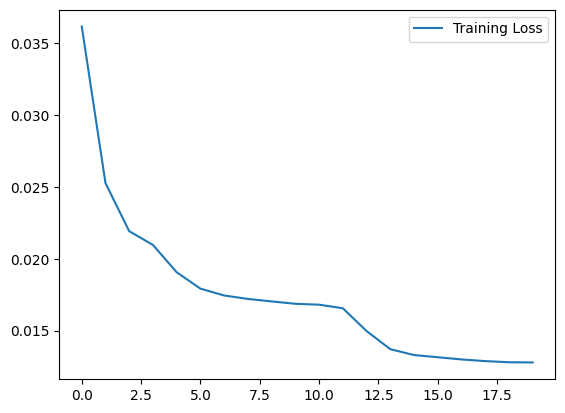

In [ ]:
plt.plot(model.history["loss"], label="Training Loss")
plt.legend()

### Define a function to smoothing the wave curve

In [ ]:
# smoothing the wave of decoded_data
from scipy.signal import savgol_filter

def smooth_wave(wave):
  # Define the parameters for the Savitzky-Golay filter
  window_length = 10  # The length of the window (odd number)
  polyorder = 2  # The order of the polynomial fit

  return savgol_filter(wave, window_length, polyorder)

### Testing the model

In [ ]:
encoded_data = autoencoder.encoder(X).numpy()
decoded_data = autoencoder.decoder(encoded_data).numpy()

# Apply the Savitzky-Golay filter
decoded_data = smooth_wave(decoded_data)

### Calculate the Mean Average Error (MAE) from all data

In [ ]:
loss = tf.keras.losses.mae(decoded_data, X)
print("Mean Average Error : {}".format(np.mean(loss * 100)))

1.3469677987160895

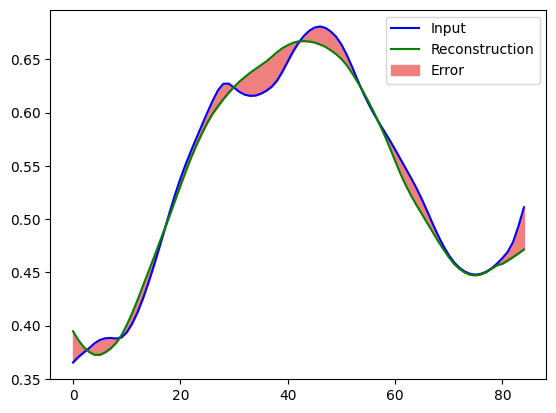

In [ ]:
idx = 100
plt.plot(X[idx], 'b')
plt.plot(decoded_data[idx], 'g')
plt.fill_between(np.arange(X.shape[1]), decoded_data[idx], X[idx], color='lightcoral')
plt.legend(labels=["Input", "Reconstruction", "Error"])

plt.show()

In [ ]:
# Create figure and axis objects
fig, ax = plt.subplots(10)

for idx in range(10):
  # Plot each time series
  ax[idx].plot(X[idx], 'b')
  ax[idx].plot(decoded_data[idx], 'g')
  ax[idx].fill_between(np.arange(X.shape[1]), decoded_data[idx], X[idx], color='lightcoral')
  ax[idx].set_title("Data {}".format(idx))
  ax[idx].legend(labels=["Input", "Reconstruction", "Error"])

# Customize the overall layout
plt.tight_layout()

# Show
plt.show()

## PART 4 : Generating New Data

In [ ]:
# Set the number of data points to generate
num_samples = 10

# Randomly sample latent vectors from a predefined range
latent_dim = 85
latent_vectors = np.random.rand(*(num_samples, latent_dim))

# Generate new data by decoding the latent vectors
generated_data = autoencoder.predict(latent_vectors)

1/1 [==============================] - 0s 22ms/step


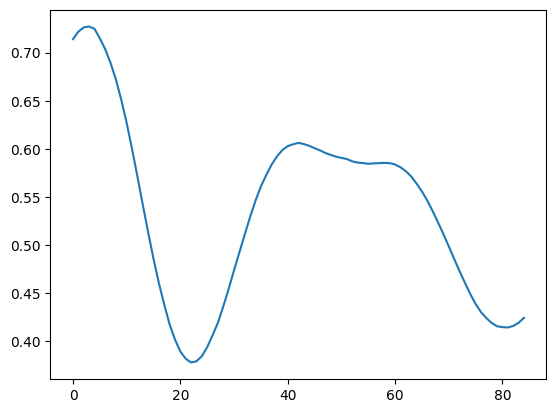

In [ ]:
plt.plot(generated_data[6])

## Smoothing it

In [ ]:
# Apply the Savitzky-Golay filter
generated_data = savgol_filter(generated_data, window_length, polyorder)

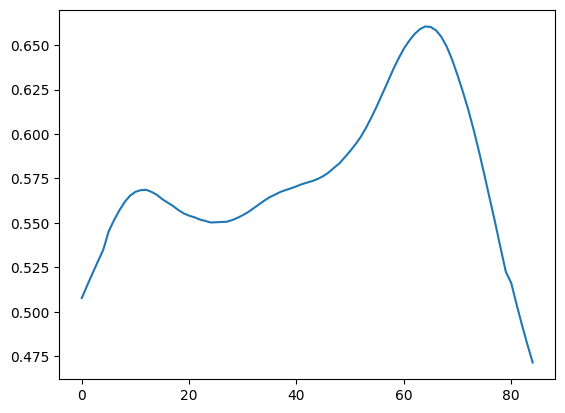

In [ ]:
plt.plot(generated_data[9])